In [1]:
from komoran3py import KomoranPy

In [2]:
import nltk
import pandas as pd
import numpy as np

In [3]:
ko = KomoranPy()

In [4]:
ko.set_user_dictionary('./user_dictionary.txt')

In [5]:
with open('../../../data/twitch_live_chat/#zilioner/2018-12-15_#zilioner.log') as f : 
    text = f.readlines()

In [6]:
text

['# Log started: 2018-12-15 21:52:42 +0900\n',
 '[21:52:42] <jatbab1004> 오늘은 바요ㅗㅇ 안하나요\n',
 '[21:52:58] <jatbab1004> YouWHY\n',
 '[21:59:33] <스트룩 (dkdmrldmdl)> 침하\n',
 '[21:59:35] <스트룩 (dkdmrldmdl)> 와!\n',
 '[21:59:36] <로알파 (bg4538)> 아이고 수장님 ㅠㅠ\n',
 '[21:59:37] <twfranken00> 침 하\n',
 '[21:59:38] <Imhappyyy> 침하\n',
 '[21:59:38] <알리오스 (bigaliotha)> 어게이\n',
 '[21:59:38] <헤타라고 (hetaarago)> 쏘하\n',
 '[21:59:39] <%수요미식홰 (soooyeon41)> 쏘하\n',
 '[21:59:40] <앞으로대조영 (cowo008)> 침하\n',
 '[21:59:40] <기무성태 (yumyap)> 치마\n',
 '[21:59:40] <zlandi67> 쏘하\n',
 '[21:59:40] <로알파 (bg4538)> 앗\n',
 '[21:59:41] <dongkingkong4626> Thoha\n',
 '[21:59:41] <티얀키 (eclick1234)> 쏘하\n',
 '[21:59:42] <%홍찰찰 (wereny)> 침하\n',
 '[21:59:42] <%수요미식홰 (soooyeon41)> 침하\n',
 '[21:59:43] <qnp00> 침항\n',
 '[21:59:43] <로알파 (bg4538)> 쏘하\n',
 '[21:59:44] <쥬이시 (pick8989)> 쏘하\n',
 '[21:59:46] <앙에스케이띠 (waterfallhwa)> 치마~!!!\n',
 '[21:59:46] <라그93 (rag8542)> 쏘하 침하\n',
 '[21:59:46] <pjy6831> 쏘하\n',
 '[21:59:46] <laonjena94> 쏘하\n',
 '[21:59:47]

In [13]:
time = []
data_chat = []
import re
my = re.compile('\[([0-9:]*)\] <(\S*[ ]*\S*)> (\w.*)')
word_list = []
for line in text:
    mytext = my.search(line)
    if mytext :
        time.append([mytext.group(1)])
        data_chat.append(mytext.group(3))
        word_list.append([mytext.group(3)])
time

[['21:52:42'],
 ['21:52:58'],
 ['21:59:33'],
 ['21:59:35'],
 ['21:59:36'],
 ['21:59:37'],
 ['21:59:38'],
 ['21:59:38'],
 ['21:59:38'],
 ['21:59:39'],
 ['21:59:40'],
 ['21:59:40'],
 ['21:59:40'],
 ['21:59:40'],
 ['21:59:41'],
 ['21:59:41'],
 ['21:59:42'],
 ['21:59:42'],
 ['21:59:43'],
 ['21:59:43'],
 ['21:59:44'],
 ['21:59:46'],
 ['21:59:46'],
 ['21:59:46'],
 ['21:59:46'],
 ['21:59:47'],
 ['21:59:47'],
 ['21:59:48'],
 ['21:59:48'],
 ['21:59:48'],
 ['21:59:48'],
 ['21:59:48'],
 ['21:59:48'],
 ['21:59:50'],
 ['21:59:50'],
 ['21:59:51'],
 ['21:59:51'],
 ['21:59:52'],
 ['21:59:52'],
 ['21:59:52'],
 ['21:59:54'],
 ['21:59:54'],
 ['21:59:54'],
 ['21:59:55'],
 ['21:59:55'],
 ['21:59:55'],
 ['21:59:55'],
 ['21:59:56'],
 ['21:59:56'],
 ['21:59:56'],
 ['21:59:57'],
 ['21:59:57'],
 ['21:59:57'],
 ['21:59:57'],
 ['21:59:57'],
 ['21:59:58'],
 ['21:59:58'],
 ['21:59:59'],
 ['21:59:59'],
 ['21:59:59'],
 ['21:59:59'],
 ['22:00:00'],
 ['22:00:00'],
 ['22:00:01'],
 ['22:00:01'],
 ['22:00:02'],
 ['22:00:0

In [14]:
df = pd.DataFrame(time)

In [15]:
df['chat'] = data_chat

In [17]:
df = df.rename(columns={0:'time'})
df = df.set_index('time')
df.index = pd.to_datetime(df.index)

In [20]:
def tokenize_tolist(text_array_flat) :
    """
        text_array_flat : 1차 리스트 / flatten 함수의 리턴값
    """
    tokens_ko_tolist = []
    line_list = []
    for word in text_array_flat : 
        for i in range(len(ko.pos(word))) : 
            line_list.append(ko.pos(word)[i][0])
            if i+1 == len(ko.pos(word)) : 
                tokens_ko_tolist.append(line_list)
                line_list = []
    return tokens_ko_tolist

In [21]:
def flatten_list(word_tolist) : 
    import numpy as np
    """
        word_tolist : 2차 리스트 / preprocessing의 리턴값
    """
    word_array = np.array(word_tolist)
    word_array_flat = word_array.flatten()
    return word_array_flat

In [22]:
tok = flatten_list(word_list)

In [23]:
tokens_ko_tolist = tokenize_tolist(tok)

In [24]:
import pickle

In [25]:
with open('./total_sentiment.pickle', 'rb') as f: 
    new_word_dic = pickle.load(f)

In [26]:
for key in new_word_dic : 
    if new_word_dic[key] == 'POS' : 
        new_word_dic[key] = 1
    elif new_word_dic[key] == 'NEG' : 
        new_word_dic[key] = -1
    else : 
        new_word_dic[key] = 0

In [27]:
new_word_dic

{'(-;': 1,
 '(^^)': 1,
 '(^-^)': 1,
 '(^^*': 1,
 '(^_^)': 1,
 '(^o^)': 1,
 '*^^*': 1,
 '/^o^\\': 1,
 ':(': 1,
 ":'-(": 1,
 ':-(': 1,
 ':-)': 1,
 ':|': 1,
 ';': 1,
 ';)': 1,
 ';-)': 1,
 '^///^': 1,
 '^^': 1,
 '^^//': 1,
 '<3': 1,
 '=)': 1,
 'XD': 1,
 'ㄱㅅ': 1,
 'ㄱㅇㄷ': 1,
 '가격이 싸다': 1,
 '가까이 사귀어': 1,
 '가까이하다': 1,
 '가다듬어': 1,
 '가다듬어 수습하는': 1,
 '가다듬어 수습하다': 1,
 '가다듬어 정하다': 1,
 '가당히': 1,
 '가뜬하게': 1,
 '가라앉혀 바로잡다': 1,
 '가르치며': 1,
 '가르침': 1,
 '가벼운 마음으로': 1,
 '가볍게 웃다': 1,
 '가볍고': 1,
 '가볍고 보드랍게': 1,
 '가분가분': 1,
 '가분히': 1,
 '가뿐가뿐': 1,
 '가뿐가뿐하다': 1,
 '가뿐가뿐히': 1,
 '가뿐하게': 1,
 '가뿐하다': 1,
 '가뿐한': 1,
 '가뿐한 느낌': 1,
 '가뿐한 느낌이': 1,
 '가뿐히': 1,
 '가장 중요한': 1,
 '가지런하게 하는': 1,
 '가지런하게 하다': 1,
 '가지런하다': 1,
 '가치': 1,
 '가치가': 1,
 '가치있는': 1,
 '각별나다': 1,
 '각별하다': 1,
 '간직하다': 1,
 '감각적이다': 1,
 '감당하다': 1,
 '감동시킬': 1,
 '감동시킬 만한': 1,
 '감모': 1,
 '감싸고': 1,
 '감정이 북받쳐': 1,
 '강렬하게': 1,
 '강세': 1,
 '강인하다': 1,
 '강하게': 1,
 '강하게 하다': 1,
 '강하고': 1,
 '강하다': 1,
 '강화하다': 1,
 '갖추다': 1,
 '개선하고': 1,
 '개성': 1,
 '개성있는': 1,
 '개성있다': 1,
 '갠

In [218]:
tokens_ko_tolist

[['오늘', '은', '바', '요', 'ㅗ', 'ㅇ', '안', '하', '나요'],
 ['YouWHY'],
 ['침하'],
 ['오', '아', '!'],
 ['아이', 'ㄱ', 'ㅗ', '수장', '님', 'ㅠ', 'ㅠ'],
 ['침', '하'],
 ['침하'],
 ['어', '게이'],
 ['쏘', '하'],
 ['쏘', '하'],
 ['침하'],
 ['치마'],
 ['쏘', '하'],
 ['앗'],
 ['Thoha'],
 ['쏘', '하'],
 ['침하'],
 ['침하'],
 ['침하', 'ㅇ'],
 ['쏘', '하'],
 ['쏘', '하'],
 ['치마', '~', '!!!'],
 ['쏘', '하', '침하'],
 ['쏘', '하'],
 ['쏘', '하'],
 ['침하', '~'],
 ['안', '되', '어', '안', '되', '어'],
 ['쏘', '하'],
 ['침하'],
 ['쏘하!!', '침하', '!!!'],
 ['thoha'],
 ['낚시', '하', '는', '거', '야', '?'],
 ['와', '아아', '아아', '치마', '쏘', '하'],
 ['쏘', '하'],
 ['침하'],
 ['쏘', '하'],
 ['쏘', '하'],
 ['쏘', '치', 'ㅁ', '하', '하'],
 ['쏘', '하'],
 ['쏘', '하'],
 ['쏘', '하'],
 ['부녀', '하이'],
 ['쏘', '하'],
 ['쏘', '하', '쏘', '하', '~'],
 ['우', '와', '아쿠아', '매직', '!!'],
 ['침하'],
 ['범블비'],
 ['쏘', '하'],
 ['침', 'ㅎ', 'ㅏ', '-'],
 ['치마', '쏘', '하'],
 ['침하쏘하!!!!'],
 ['침하', '쏘', '하'],
 ['침하', '쏘', '하'],
 ['쏘', '하', '침', '바'],
 ['범블비', '소', '리좀', '안', '나', '게', '하', '아라'],
 ['치맟미ㅏ'],
 ['cheer', '100', '쏘ㅡ하'],
 ['침하'],

In [28]:
# df['긍정도'] = 0
sentiment_list = []
score_list = []
for j, word_list in enumerate(tokens_ko_tolist) : 
    for i in range(len(word_list)) : 
        if word_list[i] in new_word_dic.keys() : 
            sentiment_list.append(new_word_dic[word_list[i]])
            if i+1 == len(word_list) : 
#                 df['긍정도'][j] = sum(sentiment_list)
#                 print(df['긍정도'][j])
                score_list.append(sum(sentiment_list))
                sentiment_list = []
        elif word_list[i] not in new_word_dic.keys() : 
            sentiment_list.append(0)
            if i+1 == len(word_list) :
                score_list.append(sum(sentiment_list))
#                 df['긍정도'][j] = sum(sentiment_list)
#                 print(df['긍정도'][j])
                sentiment_list = []
        else : print('ㅈ망')

In [29]:
df['긍정도'] = score_list

In [30]:
df['긍정도']

time
2019-01-16 21:52:42   -1
2019-01-16 21:52:58    0
2019-01-16 21:59:33    0
2019-01-16 21:59:35    0
2019-01-16 21:59:36   -3
2019-01-16 21:59:37    0
2019-01-16 21:59:38    0
2019-01-16 21:59:38    0
2019-01-16 21:59:38    0
2019-01-16 21:59:39    0
2019-01-16 21:59:40    0
2019-01-16 21:59:40    0
2019-01-16 21:59:40    0
2019-01-16 21:59:40    0
2019-01-16 21:59:41    0
2019-01-16 21:59:41    0
2019-01-16 21:59:42    0
2019-01-16 21:59:42    0
2019-01-16 21:59:43    0
2019-01-16 21:59:43    0
2019-01-16 21:59:44    0
2019-01-16 21:59:46    0
2019-01-16 21:59:46    0
2019-01-16 21:59:46    0
2019-01-16 21:59:46    0
2019-01-16 21:59:47    0
2019-01-16 21:59:47    0
2019-01-16 21:59:48    0
2019-01-16 21:59:48    0
2019-01-16 21:59:48    0
                      ..
2019-01-16 22:36:54    0
2019-01-16 22:36:55    0
2019-01-16 22:37:00    0
2019-01-16 22:37:10    0
2019-01-16 22:37:11    0
2019-01-16 22:37:17    0
2019-01-16 22:37:19    0
2019-01-16 22:37:25    0
2019-01-16 22:37:25 

In [31]:
df['긍정도'].plot(kind='bar')
plt.show()

NameError: name 'plt' is not defined

In [224]:
# np_time = np.array(time).flatten()

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin' :#맥
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows' : 
    #폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties(fname=fontPath).get_name()
    rc('font', family=fontName)
elif platform.system() == 'Linux' : 
    fontPath = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
    fontName = font_manager.FontProperties(fname=fontPath).get_name()
    rc('font', family=fontName)
#     fontPath =  '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
else : print('알수없음')
import seaborn as sns

In [33]:
df.index

DatetimeIndex(['2019-01-16 21:52:42', '2019-01-16 21:52:58',
               '2019-01-16 21:59:33', '2019-01-16 21:59:35',
               '2019-01-16 21:59:36', '2019-01-16 21:59:37',
               '2019-01-16 21:59:38', '2019-01-16 21:59:38',
               '2019-01-16 21:59:38', '2019-01-16 21:59:39',
               ...
               '2019-01-16 22:38:24', '2019-01-16 22:38:39',
               '2019-01-16 22:38:51', '2019-01-16 22:39:17',
               '2019-01-16 22:39:25', '2019-01-16 22:40:03',
               '2019-01-16 22:48:27', '2019-01-16 22:48:33',
               '2019-01-16 22:49:38', '2019-01-16 23:07:34'],
              dtype='datetime64[ns]', name='time', length=10550, freq=None)

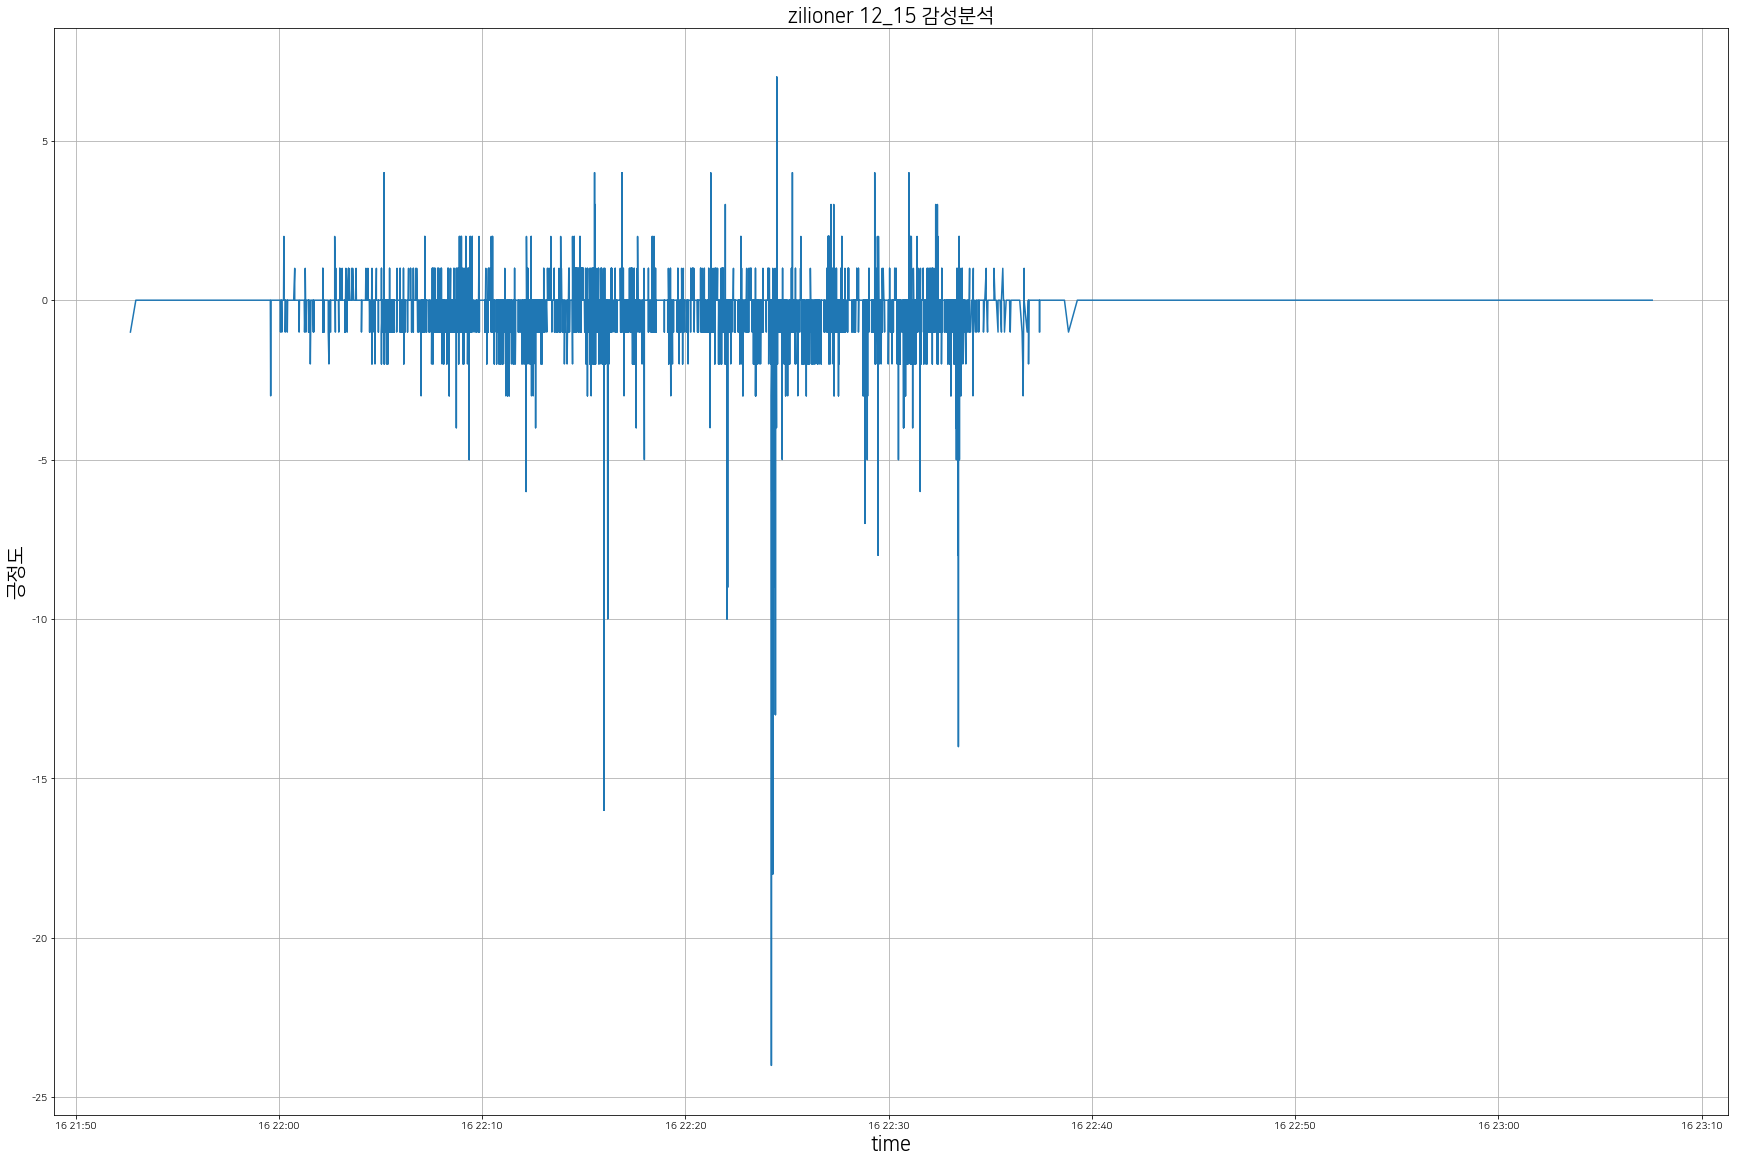

In [34]:
y1_value = score_list
x_name= df.index
# index = np_time
n_groups = len(x_name)
index = np.arange(n_groups)

plt.figure(figsize=(30,20))
plt.plot(df.index, y1_value)
plt.xlabel('time', fontsize = 20)
plt.ylabel('긍정도',fontsize = 20)
plt.title('zilioner 12_15 감성분석', fontsize = 20)
# plt.xlim( 0, n_groups)
# plt.xticks(n_groups)
# plt.ylim( -30, 15)
plt.grid(True)
plt.show()

In [35]:
series = pd.Series(df['긍정도'], index=df.index) 
w = series.resample('Min').sum()

In [36]:
w

time
2019-01-16 21:52:00    -1
2019-01-16 21:53:00     0
2019-01-16 21:54:00     0
2019-01-16 21:55:00     0
2019-01-16 21:56:00     0
2019-01-16 21:57:00     0
2019-01-16 21:58:00     0
2019-01-16 21:59:00    -3
2019-01-16 22:00:00    -1
2019-01-16 22:01:00    -7
2019-01-16 22:02:00    -6
2019-01-16 22:03:00     5
2019-01-16 22:04:00    -5
2019-01-16 22:05:00   -33
2019-01-16 22:06:00    -8
2019-01-16 22:07:00   -29
2019-01-16 22:08:00   -48
2019-01-16 22:09:00   -26
2019-01-16 22:10:00    -8
2019-01-16 22:11:00   -36
2019-01-16 22:12:00   -79
2019-01-16 22:13:00   -10
2019-01-16 22:14:00    41
2019-01-16 22:15:00   -44
2019-01-16 22:16:00   -50
2019-01-16 22:17:00   -50
2019-01-16 22:18:00    -5
2019-01-16 22:19:00   -23
2019-01-16 22:20:00   -13
2019-01-16 22:21:00   -50
                       ..
2019-01-16 22:38:00    -1
2019-01-16 22:39:00     0
2019-01-16 22:40:00     0
2019-01-16 22:41:00     0
2019-01-16 22:42:00     0
2019-01-16 22:43:00     0
2019-01-16 22:44:00     0
2019-01

In [37]:
df_sum = pd.DataFrame(w)

In [38]:
df_sum.index = pd.to_datetime(df_sum.index).strftime('%H:%M:%S')

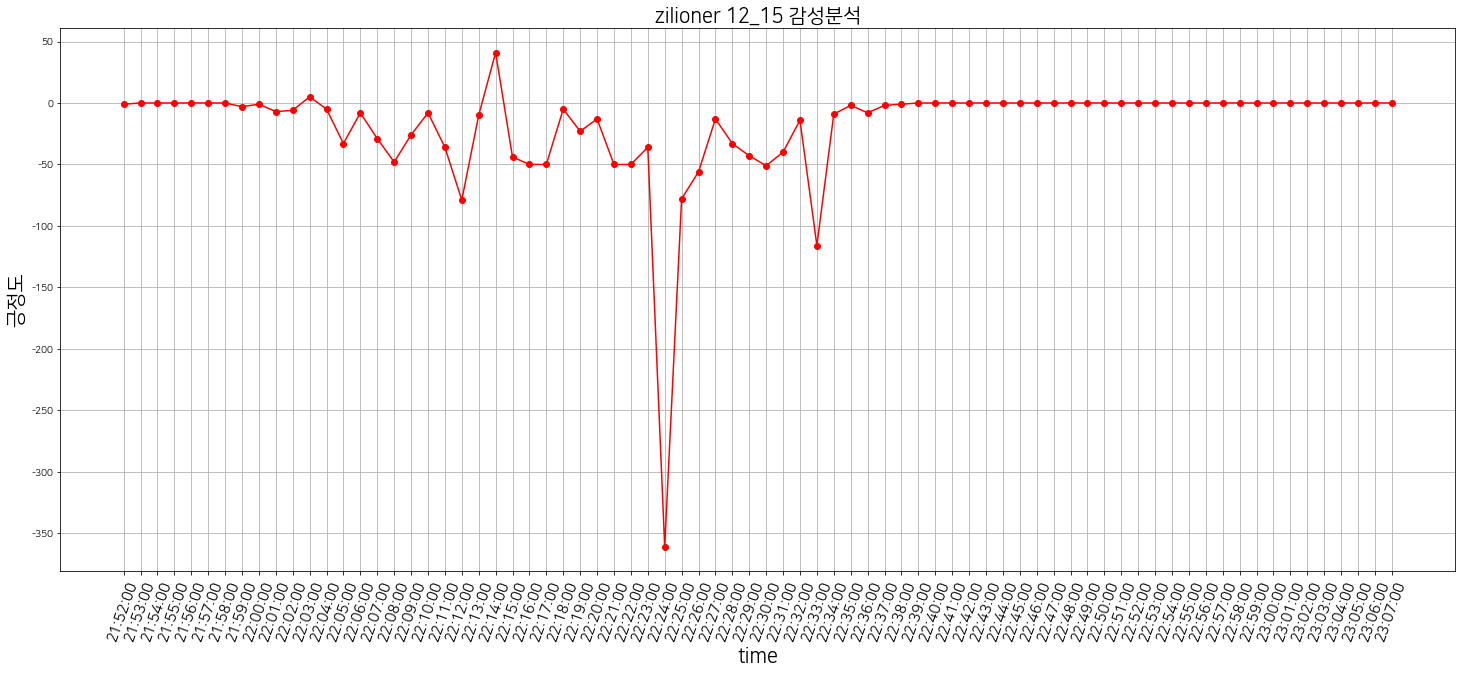

In [39]:
y1_value = df_sum['긍정도']
x_name= df_sum.index
# index = np_time
n_groups = len(x_name)
index = np.arange(n_groups)

plt.figure(figsize=(25,10), edgecolor='c')
plt.plot(df_sum.index, y1_value, marker='o',color = 'r')
plt.xlabel('time', fontsize = 20)
plt.ylabel('긍정도',fontsize = 20)
plt.title('zilioner 12_15 감성분석', fontsize = 20)
# plt.xlim( 0, n_groups)
plt.xticks(df_sum.index, rotation = 70, fontsize=15)
# plt.ylim( -30, 15)
plt.grid(True)
plt.show()